In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
x = np.linspace(-10, 10, 1000)

__Variable types__

Variables, also referred as __features__ in the data world can be any of the following two:

- Quantitative: a quantity
  - continuous
  - discrete
  
- Qualitative: a feature
  - nominal: doesn't have order
  - ordinal: have an order (B, A, A+)
  - binary


Usually:
- _quantitative_ features are used in __regression__ tasks
- _qualitative_ features are used in __classification__ tasks

## Linear functions

Linear functions are commonly used to _adjust_ or _fit_ a distribution of data.

$y = \theta_0{x} + \theta_1$

Where:

$\theta_0 = \frac{y_2 - y_1}{x_2 - x_1}$ which is the slope of the line between two points

$\theta_1$ is the _bias_, which is the intersection with the y-axis

In [4]:
def linear_func(x, m, b):
    return m*x + b

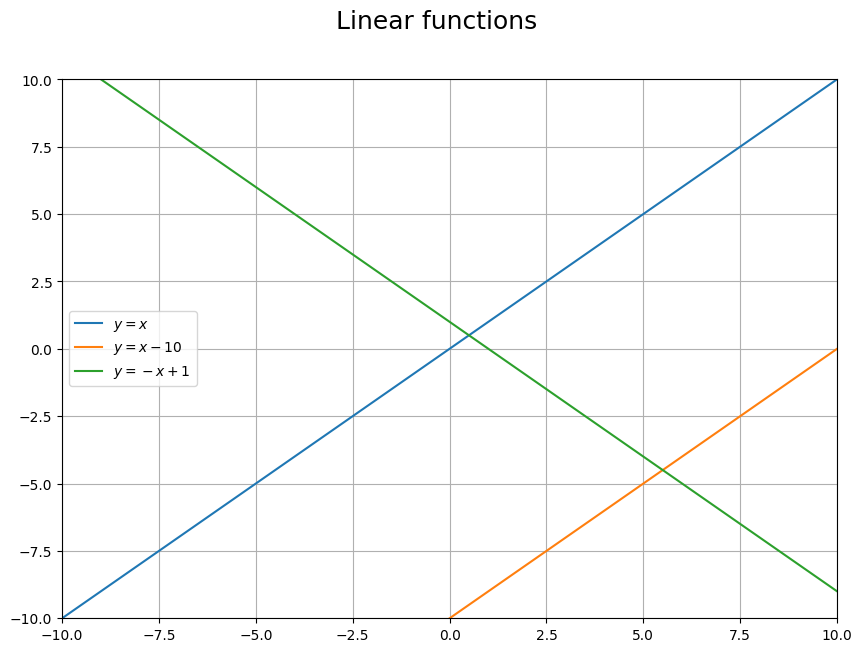

In [5]:
fig, ax = plt.subplots(figsize=(10, 7))

fig.suptitle("Linear functions", fontsize=18)

_ = ax.plot(x, linear_func(x, 1, 0))
_ = ax.plot(x, linear_func(x, 1, -10))
_ = ax.plot(x, linear_func(x, -1, 1))

# Assign a label to each plotted graphic
ax.legend([
    r"$y = x$",
    r"$y = x - 10$",
    r"$y = -x + 1$"
])

# Set the x-axis and y-axis limits (to see the origin)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

ax.grid()

### Polynomial functions

$y(x) = a_nx^n + a_{n-1}x^{n-1} + a_{n-2}x^{n-2} + ... + a_2x^2 + a_1x + a_0$

Which can be expressed as:

$y(x) = \sum_{n=0}^N{a_nx^n}$

In [6]:
def polynomial_func(x, N, a=None):
    """
    Apply the N-th polynomial function to the input vector x
    Args:
        x (numpy.array): Input vector for which the polynomial function will be applied
        N (int): The degree of the polynomial

    Returns:
        numpy.array: The polynomial function of degree N applied to the input vector
    """
    # Variable to 'control' the summation
    n = 0
    
    # Output vector
    y_n = np.zeros_like(x)
    
    # Vector of the polynomial weights
    if not a or not len(a):
        a = np.ones_like(x)

    while n <= N:
        y_n = y_n + a*x**n
        n += 1

    return y_n

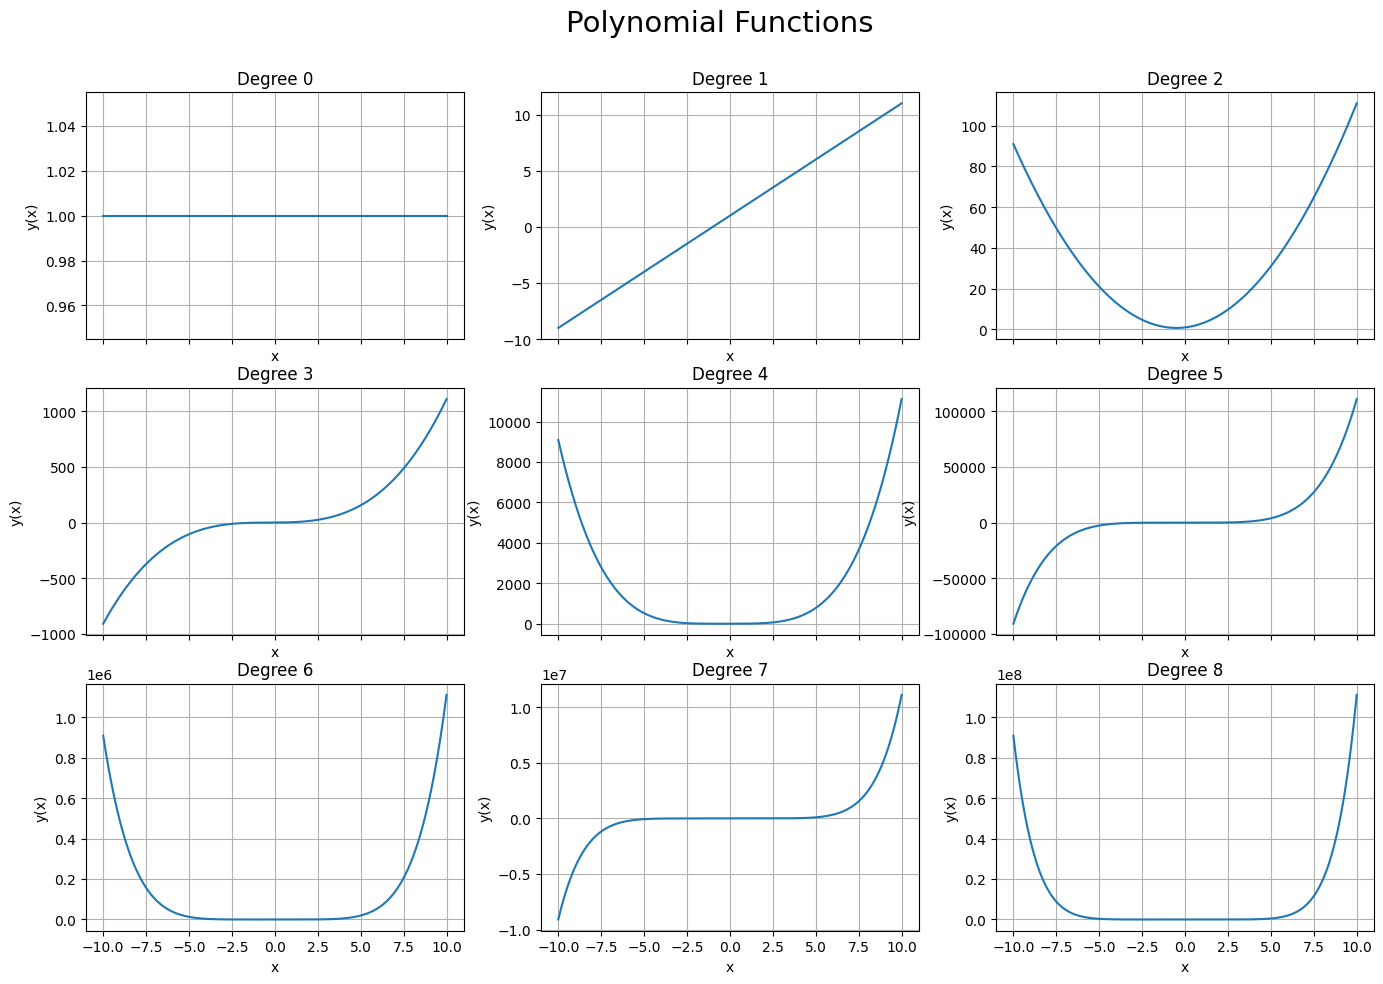

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(14, 10), sharex=True)

fig.suptitle("Polynomial Functions", fontsize=21)

fig.tight_layout(pad=2.5)

n = 0

weights = np.ones_like(x)

weights = [ weights[n] * (n + 1) for n in range(0, len(x)) ]

for i in range(3):
    for j in range(3):
        y = polynomial_func(x, n, a=None)
        plotter = ax[i][j]
        plotter.plot(x, y)
        plotter.set_title(F"Degree {n}", fontsize=12)
        plotter.set_xlabel("x")
        plotter.set_ylabel("y(x)")
        plotter.grid()

        n += 1

## Trascendental Functions

- Trigonometric
- Exponential
- Logarithmic

In [22]:
# Trigonometric (sinusoids)
def sinusoids(x, A, f_0, phi):
    y_x = A * np.cos(2*np.pi*f_0*x + phi)
    return y_x

# Convert degrees to radians
def to_radians(degrees):
    return degrees * (np.pi/180)

In [23]:
# Parameters for the sinusoids
# Frequency [Hz]
f_0 = 2
# Period [s]
T_0 = 1/f_0
# Angular frequency [rad/s]
w_0 = (2*np.pi)/T_0
# Phase [rad]
phi = to_radians(90)

# Vector that spans 3 periods
x = np.linspace(0, T_0 * 3, 100)

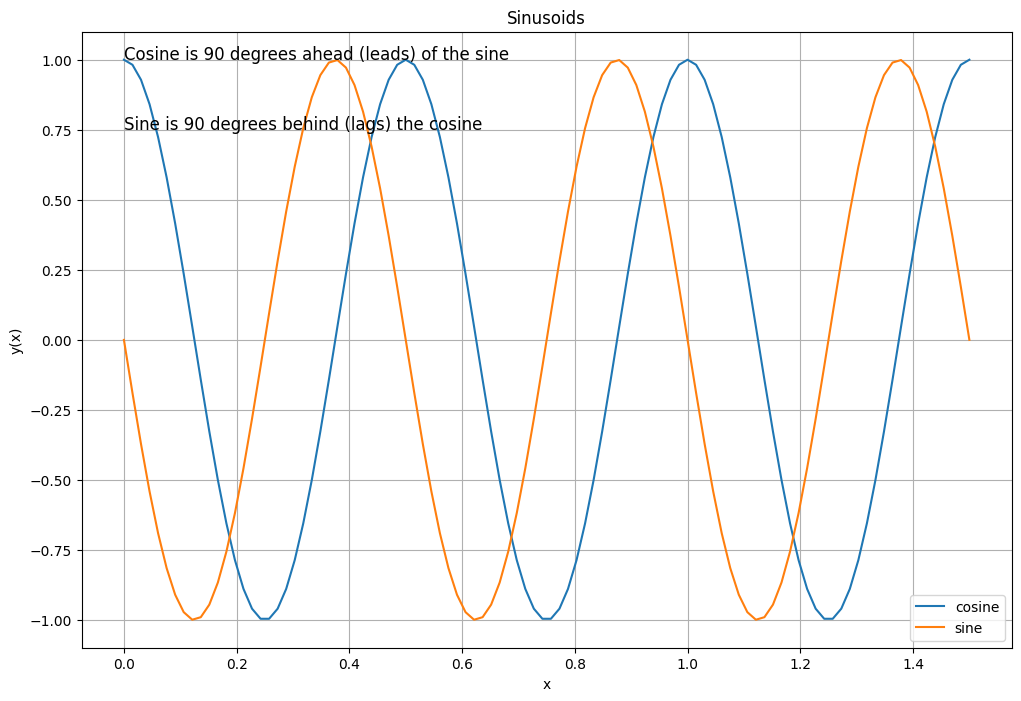

In [38]:
cosine = sinusoids(x, 1, f_0, 0)
sine = sinusoids(x, 1, f_0, phi)

_ = plt.figure(figsize=(12, 8))
_ = plt.title("Sinusoids")
_ = plt.text(0, 1, "Cosine is 90 degrees ahead (leads) of the sine", fontdict={"size": 12})
_ = plt.text(0, 0.75, "Sine is 90 degrees behind (lags) the cosine", fontdict={"size": 12})
_ = plt.plot(x, cosine)
_ = plt.plot(x, sine)
_ = plt.xlabel("x")
_ = plt.ylabel("y(x)")
_ = plt.grid()
_ = plt.legend(["cosine", "sine"])

/tmp/ipykernel_518/1636952176.py:5: RuntimeWarning: divide by zero encountered in log
  _ = plt.plot(x, np.log(x))
/tmp/ipykernel_518/1636952176.py:6: RuntimeWarning: divide by zero encountered in log2
  _ = plt.plot(x, np.log2(x))
/tmp/ipykernel_518/1636952176.py:7: RuntimeWarning: divide by zero encountered in log10
  _ = plt.plot(x, np.log10(x))


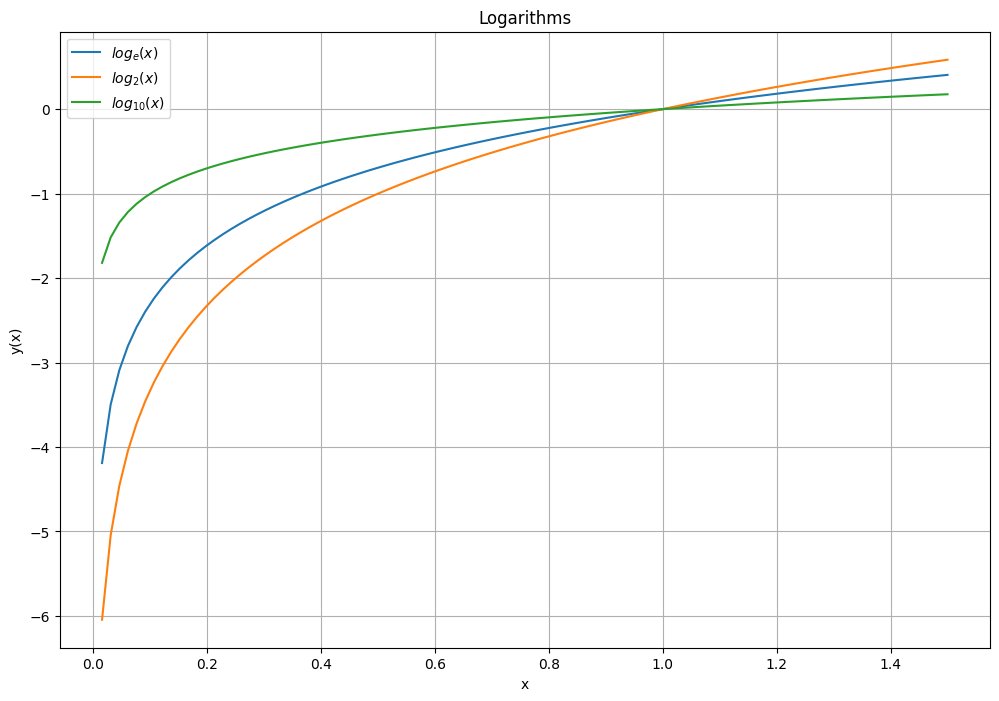

In [51]:
# Logarithms

plt.figure(figsize=(12, 8))

_ = plt.plot(x, np.log(x))
_ = plt.plot(x, np.log2(x))
_ = plt.plot(x, np.log10(x))
_ = plt.title("Logarithms")
_ = plt.xlabel("x")
_ = plt.ylabel("y(x)")
_ = plt.grid()
_ = plt.legend([r"$log_e(x)$", r"$log_2(x)$", r"$log_{10}(x)$"])

In [58]:
# Piecewise functions
# The unit step function (Heaviside)
def unit_step(x, delay):
    n = np.zeros_like(x)
    _delay = delay if delay else 1

    return np.where(x > _delay, 1, 0)


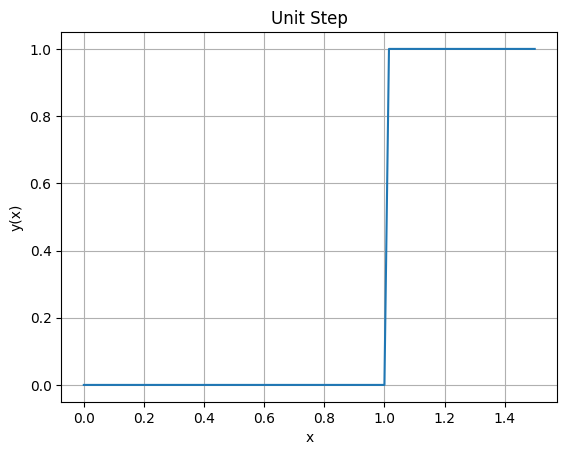

In [65]:
step = unit_step(x, 0)

_ = plt.title("Unit Step")
_ = plt.plot(x, step)
_ = plt.xlabel("x")
_ = plt.ylabel("y(x)")
_ = plt.grid()

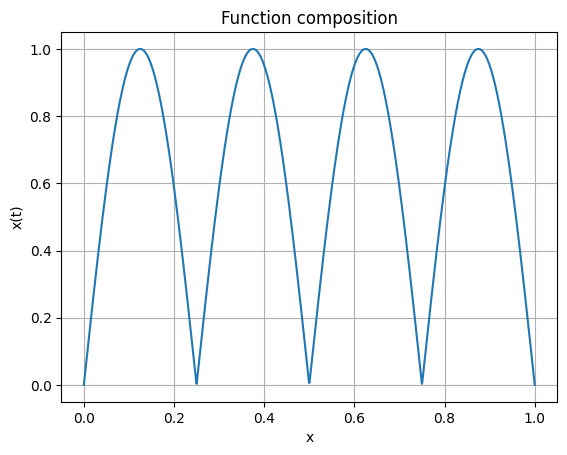

In [109]:
# Function composition

x = np.linspace(0, T_0 * 2, 1000)

f_o_g = np.abs(sinusoids(x, 1, f_0, to_radians(90)))

_ = plt.title("Function composition")
_ = plt.plot(x, f_o_g)
_ = plt.xlabel("x")
_ = plt.ylabel("x(t)")
_ = plt.grid()